In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
tf.compat.v1.disable_eager_execution() # to turn off version 2

In [4]:
(X_train ,Y_train ),(X_test , Y_test) = tf.keras.datasets.cifar10.load_data()
X_train.shape , Y_train.shape, X_test.shape,Y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [5]:
X_train[:5],Y_train[:5]

(array([[[[ 59,  62,  63],
          [ 43,  46,  45],
          [ 50,  48,  43],
          ...,
          [158, 132, 108],
          [152, 125, 102],
          [148, 124, 103]],
 
         [[ 16,  20,  20],
          [  0,   0,   0],
          [ 18,   8,   0],
          ...,
          [123,  88,  55],
          [119,  83,  50],
          [122,  87,  57]],
 
         [[ 25,  24,  21],
          [ 16,   7,   0],
          [ 49,  27,   8],
          ...,
          [118,  84,  50],
          [120,  84,  50],
          [109,  73,  42]],
 
         ...,
 
         [[208, 170,  96],
          [201, 153,  34],
          [198, 161,  26],
          ...,
          [160, 133,  70],
          [ 56,  31,   7],
          [ 53,  34,  20]],
 
         [[180, 139,  96],
          [173, 123,  42],
          [186, 144,  30],
          ...,
          [184, 148,  94],
          [ 97,  62,  34],
          [ 83,  53,  34]],
 
         [[177, 144, 116],
          [168, 129,  94],
          [179, 142,  87],
   

In [6]:
np.unique(Y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [7]:
encoder = OneHotEncoder(sparse_output=False)
# Y_train_t = encoder.fit_transform(Y_train)
# Y_test_t = encoder.transform(Y_test)
Y_train_t = encoder.fit_transform(Y_train.reshape(-1,1))
Y_test_t = encoder.transform(Y_test.reshape(-1,1))
Y_train_t.shape ,Y_test_t.shape

((50000, 10), (10000, 10))

In [11]:
X_train_t = X_train.reshape(50000,32*32*3,)
X_test_t = X_test.reshape(10000,32*32*3,)
X_train_t.shape,X_test_t.shape

((50000, 3072), (10000, 3072))

In [19]:
seed = 12 ## To get Same weights every time 

n_inputs = 32*32*3
n_hidden1 = 216
n_hidden2 = 216
n_classes = 10 ## output uints 

weights = {
    'h1' : tf.Variable(tf.compat.v1.random_normal((n_inputs,n_hidden1),seed=seed)),
    'h2' : tf.Variable(tf.compat.v1.random_normal((n_hidden1,n_hidden2),seed=seed)),
    'out' : tf.Variable(tf.compat.v1.random_normal((n_hidden2,n_classes),seed=seed))
}
biases = {
    'h1' : tf.Variable(tf.compat.v1.random_normal((n_hidden1,),seed=seed)),
    'h2' : tf.Variable(tf.compat.v1.random_normal((n_hidden2,),seed=seed)),
    'out' : tf.Variable(tf.compat.v1.random_normal((n_classes,),seed=seed))
}

In [39]:
def forward_propagation(X,weights,biases):
    in_layer1 = tf.add(tf.matmul(X,weights['h1']) , biases['h1'])
    out_layer1 = tf.nn.relu(in_layer1)
    
    in_layer2 = tf.add(tf.matmul(out_layer1,weights['h2']) , biases['h2'])
    out_layer2 = tf.nn.relu(in_layer2)

    output = tf.add(tf.matmul(out_layer2,weights['out']) , biases['out'])
   ## We are keepinh no activation functon on output 
    return output 

In [33]:
X = tf.compat.v1.placeholder('float',[None,n_inputs])
Y = tf.compat.v1.placeholder(tf.int32,[None,n_classes])

Y_pred_t  = forward_propagation(X,weights,biases)

In [34]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=Y_pred_t , labels=Y))

optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=0.0005)
optimize = optimizer.minimize(cost)

In [35]:
sess = tf.compat.v1.Session()
sess.run(tf.compat.v1.global_variables_initializer()) 

In [36]:
%%time 

batch_size = 100
n_size = len(Y_train_t)
X_train_ = X_train_t
Y_train_ = Y_train_t
index = np.arange(n_size)

for i in range(25):
    # np.random.shuffle(index)

    # X_train = X_train[index]
    # Y_train = Y_train[index]
    
    total_cost = 0
    for j in range(batch_size , n_size , batch_size):
        batch_X = X_train_[j-batch_size : j]
        batch_Y = Y_train_[j-batch_size : j]
        c,_ = sess.run([cost,optimize] , feed_dict={X:batch_X,Y:batch_Y})
        total_cost += c ## Total cost is better to evealute overall perfromace ..
 
    print(i,':',total_cost)
  #10154430.033630371  

0 : 45964.76922607422
1 : 23641.58627128601
2 : 15763.531816482544
3 : 12024.33570098877
4 : 9032.873627662659
5 : 6571.605361938477
6 : 5165.845622062683
7 : 4297.53675365448
8 : 3494.4371705055237
9 : 3116.527026414871
10 : 2688.6062014102936
11 : 2446.8949117660522
12 : 2304.669275999069
13 : 2145.2826268672943
14 : 2116.9298026561737
15 : 2001.8572120666504
16 : 1963.8717730045319
17 : 1927.2395606040955
18 : 1867.404688835144
19 : 1822.9307351112366
20 : 1860.2293639183044
21 : 1844.148790359497
22 : 1776.647390127182
23 : 1704.1316418647766
24 : 1701.436681509018
CPU times: total: 6min 23s
Wall time: 2min 13s


In [38]:
Y_pred = tf.argmax(Y_pred_t,1) # axis=1 
Y_true = tf.argmax(Y,1)

Corrects = tf.equal(Y_pred , Y_true)

Y_train_pred ,correct_train = sess.run( [Y_pred,Corrects] ,feed_dict = {X:X_train_t ,Y:Y_train_t})
Y_test_pred ,correct_test = sess.run( [Y_pred,Corrects] ,feed_dict = {X:X_test_t ,Y:Y_test_t})

print("Train Accuracy :",correct_train.mean()) 
print("Test Accuracy :",correct_test.mean()) 

Train Accuracy : 0.1968
Test Accuracy : 0.1955


### Score

In [22]:
from sklearn.metrics import confusion_matrix , classification_report
import pandas as pd
labels = np.arange(n_classes)

In [23]:
pd.DataFrame(confusion_matrix(Y_train ,Y_train_pred,labels=labels),columns=labels,index=labels) 

,0,1,2,3,4,5,6,7,8,9
0,5090,9,179,399,50,3,258,0,12,0
1,12,5844,18,92,23,1,8,0,2,0
2,40,2,5083,84,633,0,149,0,8,1
3,110,24,68,5568,180,0,42,0,5,3
4,13,7,611,236,4975,1,146,0,11,0
5,0,1,0,0,1,5924,1,26,3,44
6,803,7,811,319,775,1,3260,0,24,0
7,1,1,1,0,0,127,0,5427,8,435
8,28,2,50,35,45,18,33,4,5784,1
9,0,1,0,0,0,4,0,24,0,5971


In [24]:
pd.DataFrame(classification_report(Y_train ,Y_train_pred,labels=labels,output_dict=True)) 

,0,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.834837,0.990844,0.745199,0.826972,0.744538,0.974502,0.836541,0.990148,0.987536,0.925019,0.8821,0.885614,0.885614
recall,0.848333,0.974000,0.847167,0.928000,0.829167,0.987333,0.543333,0.904500,0.964000,0.995167,0.8821,0.882100,0.882100
f1-score,0.841531,0.982350,0.792918,0.874578,0.784577,0.980876,0.658785,0.945388,0.975626,0.958812,0.8821,0.879544,0.879544
support,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,0.8821,60000.000000,60000.000000


In [25]:
pd.DataFrame(confusion_matrix(Y_test ,Y_test_pred,labels=labels),columns=labels,index=labels)

,0,1,2,3,4,5,6,7,8,9
0,745,6,36,84,17,4,97,0,10,1
1,4,957,4,23,4,0,7,1,0,0
2,19,3,766,20,129,0,58,0,3,2
3,35,10,23,844,48,3,24,2,10,1
4,2,2,144,31,760,0,57,0,4,0
5,0,0,1,2,0,940,0,32,4,21
6,150,4,153,60,160,1,456,1,15,0
7,0,0,0,0,0,52,0,860,1,87
8,9,0,20,8,16,11,14,4,914,4
9,0,1,0,0,0,17,1,25,0,956


In [26]:
pd.DataFrame(classification_report(Y_test ,Y_test_pred,labels=labels,output_dict=True)) 

,0,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.772822,0.973550,0.667829,0.787313,0.670194,0.914397,0.638655,0.929730,0.951093,0.891791,0.8198,0.819737,0.819737
recall,0.745000,0.957000,0.766000,0.844000,0.760000,0.940000,0.456000,0.860000,0.914000,0.956000,0.8198,0.819800,0.819800
f1-score,0.758656,0.965204,0.713554,0.814672,0.712277,0.927022,0.532089,0.893506,0.932177,0.922780,0.8198,0.817194,0.817194
support,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,0.8198,10000.000000,10000.000000


## Practice

In [13]:
Images = X_test[:12]

In [29]:
wrong = 2
right = 6 
bool_a = Y_test_pred ==wrong 
bool_b = Y_test ==right 
Images = X_test[bool_a*bool_b]

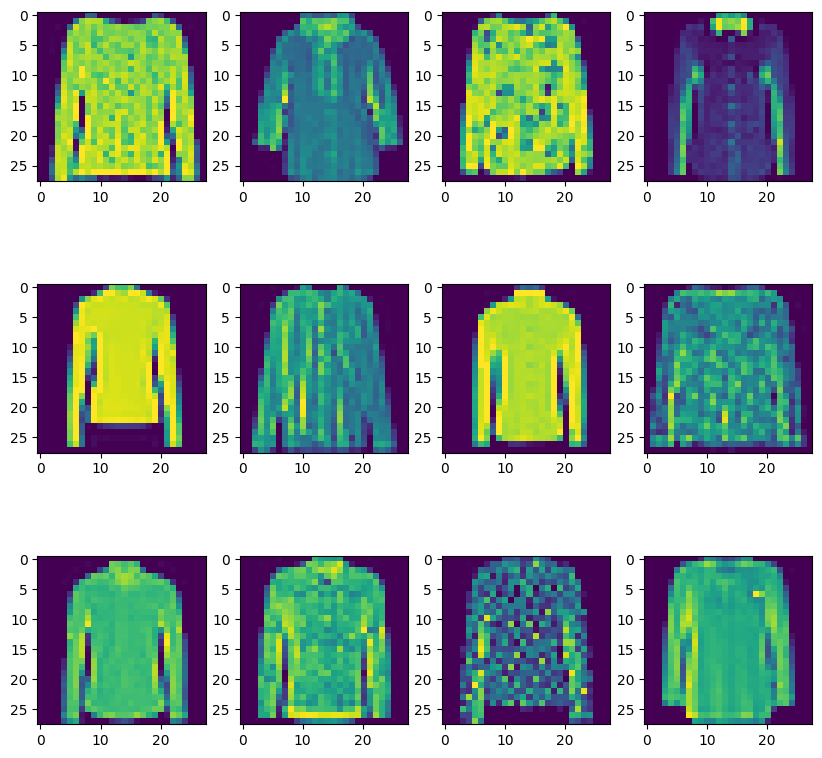

In [30]:
fig = plt.figure(figsize=(10,10))
i=0
for i in range(min(12,len(Images))):
    ax = fig.add_subplot(3,4,i+1)
    ax.imshow(Images[i])
plt.show()